## COSC 6880 - DATA ANALYTICS
## Assignment 2: Hypothesis Testing
#### Author: Khoi Nguyen
#### Date: 02/19/2024

## Hypothesis 6: In Corpus Christi, when the monthly average temperature gets higher, the monthly average wind speed will also get higher

- Null Hypothesis (H<sub>0</sub>): In Corpus Christi, when the monthly average temperature gets higher, the monthly average wind speed will also get higher.
- Alternative Hypothesis (H<sub>1</sub>): In Corpus Christi, when the monthly average temperature gets higher, the monthly average wind speed will get lower or they don't have any kind of correlation at all.

#### Environment Setup

In [1]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np
from scipy import stats

#### Loading data into dataframe

In [2]:
corpus_christi_point_data_2000_2006 = pd.read_csv('data/corpus_christi_2000_2006.csv')

In [3]:
corpus_christi_point_data_2007_2024 = pd.read_csv('data/corpus_christi_2007_2024.csv')

In [4]:
# merge the two dataframes
corpus_christi_point_data = pd.concat([corpus_christi_point_data_2000_2006, corpus_christi_point_data_2007_2024])
corpus_christi_point_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,CDSD,CDSD_ATTRIBUTES,...,WDF5,WDF5_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES
0,USC00412011,"CORPUS CHRISTI NWS, TX US",27.779300,-97.505500,13.4,2004-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00412011,"CORPUS CHRISTI NWS, TX US",27.779300,-97.505500,13.4,2004-11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00412011,"CORPUS CHRISTI NWS, TX US",27.779300,-97.505500,13.4,2004-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00412011,"CORPUS CHRISTI NWS, TX US",27.779300,-97.505500,13.4,2005-01,NaN,NaN,66.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00412011,"CORPUS CHRISTI NWS, TX US",27.779300,-97.505500,13.4,2005-02,NaN,NaN,134.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,US1TXNU0015,"CORPUS CHRISTI 9.1 NW, TX US",27.802861,-97.393186,NaN,2023-08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,US1TXNU0015,"CORPUS CHRISTI 9.1 NW, TX US",27.802861,-97.393186,NaN,2023-09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,US1TXNU0015,"CORPUS CHRISTI 9.1 NW, TX US",27.802861,-97.393186,NaN,2023-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3151,US1TXNU0015,"CORPUS CHRISTI 9.1 NW, TX US",27.802861,-97.393186,NaN,2023-11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Calculating the mean monthly wind speed and mean monthly temperature between stations located in Corpus Christi

In [21]:
# print statistical summary of the data
corpus_christi_point_data.describe()
# print skewness of the data
corpus_christi_point_data['AWND'].skew()
# print kurtosis of the data
corpus_christi_point_data['AWND'].kurtosis()
# print mean of the data
corpus_christi_point_data['AWND'].mean()
# print median of the data
corpus_christi_point_data['AWND'].median()
# print count of the data
corpus_christi_point_data['AWND'].count()

565

In [6]:
corpus_christi_ws_point_data = corpus_christi_point_data.groupby('DATE')['AWND'].mean()
corpus_christi_ws_point_data = corpus_christi_ws_point_data.reset_index()

In [7]:
corpus_christi_temperature_point_data = corpus_christi_point_data.groupby('DATE')['TAVG'].mean()
corpus_christi_temperature_point_data = corpus_christi_temperature_point_data.reset_index()
corpus_christi_temperature_point_data

,DATE,TAVG
0,2000-01,61.55
1,2000-02,67.25
2,2000-03,71.20
3,2000-04,73.10
4,2000-05,80.35
...,...,...
285,2023-10,75.35
286,2023-11,65.26
287,2023-12,62.94
288,2024-01,55.15


#### Analyses to prove or disprove the hypothesis

/var/folders/zq/5kj4j29n5g1_svkqqfs5bc4h0000gr/T/ipykernel_21469/3701962850.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


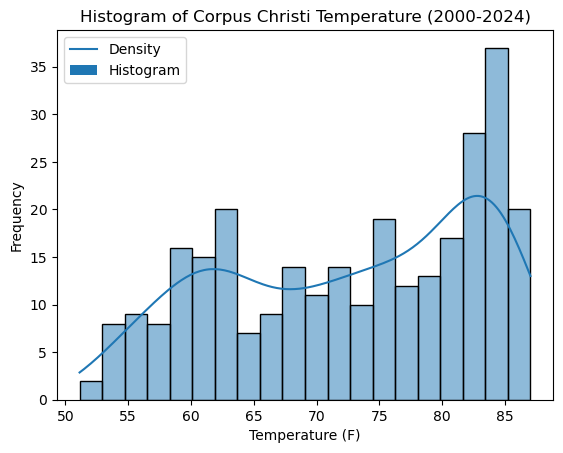

In [8]:
# histogram of temperature values
fig, ax = plt.subplots()
sns.histplot(corpus_christi_temperature_point_data['TAVG'], kde=True, bins=20, ax=ax)
ax.set_title('Histogram of Corpus Christi Temperature (2000-2024)')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Frequency')
# add legend to the plot
plt.legend(['Density', 'Histogram'])
fig.show()

/var/folders/zq/5kj4j29n5g1_svkqqfs5bc4h0000gr/T/ipykernel_21469/594349878.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


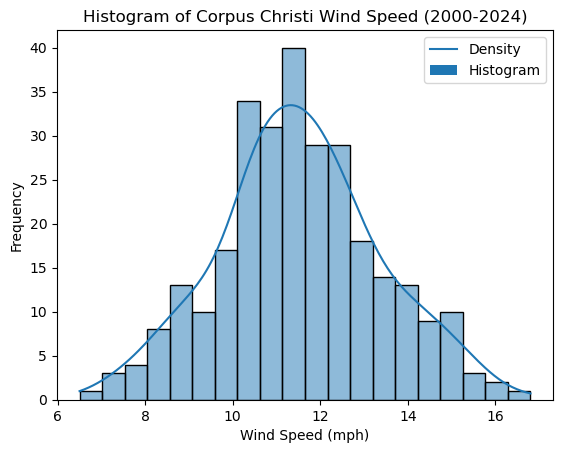

In [9]:
# histogram of wind speed values
fig, ax = plt.subplots()
sns.histplot(corpus_christi_ws_point_data['AWND'], kde=True, bins=20, ax=ax)
ax.set_title('Histogram of Corpus Christi Wind Speed (2000-2024)')
ax.set_xlabel('Wind Speed (mph)')
ax.set_ylabel('Frequency')
plt.legend(['Density', 'Histogram'])
fig.show()

#### Remove the records with NaN temperature value or NaN wind speed value

In [10]:
# for the time when the mean wind speed is nan, remove the record and the correspond precipitation record and the opposite
corpus_christi_ws_point_data = corpus_christi_ws_point_data.dropna()
corpus_christi_temperature_point_data = corpus_christi_temperature_point_data[corpus_christi_temperature_point_data['DATE'].isin(corpus_christi_ws_point_data['DATE'])]

In [11]:
# for the time when the mean wind speed is nan, remove the record and the correspond precipitation record and the opposite
corpus_christi_temperature_point_data = corpus_christi_temperature_point_data.dropna()
corpus_christi_ws_point_data = corpus_christi_ws_point_data[corpus_christi_ws_point_data['DATE'].isin(corpus_christi_temperature_point_data['DATE'])]

#### Use plots to visualize correlation between the two variables

/var/folders/zq/5kj4j29n5g1_svkqqfs5bc4h0000gr/T/ipykernel_21469/3355435072.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


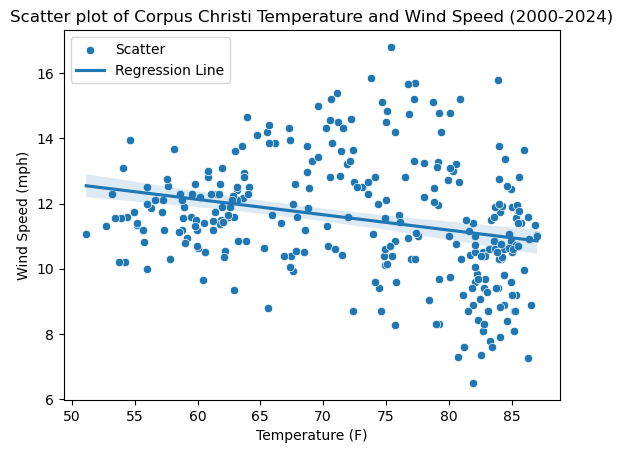

In [12]:
# plot the scatter plot of temperature and wind speed
fig, ax = plt.subplots()
sns.scatterplot(data=corpus_christi_temperature_point_data, x='TAVG', y=corpus_christi_ws_point_data['AWND'], ax=ax)
# add a trend line
sns.regplot(data=corpus_christi_temperature_point_data, x='TAVG', y=corpus_christi_ws_point_data['AWND'], scatter=False, ax=ax)
ax.set_title('Scatter plot of Corpus Christi Temperature and Wind Speed (2000-2024)')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Wind Speed (mph)')
# add legend of scatter plot and regression plot
plt.legend(['Scatter', 'Regression Line'])
fig.show()


#### Perform quantitative analyses for hypothesis testing

In [13]:
# heat map to show the correlation between temperature and wind speed
corpus_christi_temperature_ws_point_data = pd.merge(corpus_christi_temperature_point_data, corpus_christi_ws_point_data, on='DATE')
corpus_christi_temperature_ws_point_data = corpus_christi_temperature_ws_point_data.drop(columns='DATE')

In [14]:
# Perform Spearman's Rank Correlation
corr, p_value = stats.spearmanr(corpus_christi_temperature_ws_point_data['TAVG'], corpus_christi_temperature_ws_point_data['AWND'])

# Print the results
print(f'Spearman correlation coefficient: {corr}')

Spearman correlation coefficient: -0.30046140841110586


the Spearman's rank coefficient is -0.30046140841110586, which indicates that there is a weak negative relationship between the two variables. This means there is a higher probability that when the temperature gets higher, the wind speed gets lower.

In [15]:
# Performing Kendall's Tau test
tau, p_value = stats.kendalltau(corpus_christi_temperature_ws_point_data['TAVG'], corpus_christi_temperature_ws_point_data['AWND'])

print(f'Kendall\'s Tau correlation coefficient: {tau}')

Kendall's Tau correlation coefficient: -0.17512308946057453


While performing Kendall's Tau analysis to test the hypothesis, we can see the coefficient of -0.17, which also indicates the weak negative relationship as similar to the Spearman's rank analysis.

Therefore, we can come to the conclusion that the null hypothesis can be disproved.